Whitney Humecky WJh190000
Ann Biju AXB190082

# CS 4372 Assignment 2 - CLASSIFICATION DATASET
In this section, you will perform data pre-processing, loading, model creation and parameter
tuning using GridSearchCV and results analysis.

#2.1 Pre-Processing
The following are the required pre-processing steps. Of course, you can add more as per your
requirements.

• Loading the data into Pandas DataFrame object. Remember to use public URLs to
read the file.

• Examining data for consistency: Check for null values, missing data, and any data inconsistency and handle them before proceeding forward.

• Examining attributes and target variable(s): Be sure you clearly understand each of the attributes and the target variable. Examine the various attributes and convert any categorical ones to numerical ones, if needed. Obtain and output summary of the attributes. Are the attributes normally distributed? If not, what could be the reason?

• Standardize and normalize the attributes.

• Find how the attributes are correlated to each other and the target variable. Perform numerical and visual analysis and output plots and results.

• Identify a few important attributes and proceed forward. Do not use all attributes blindly.


In [22]:
! pip install ucimlrepo
import ucimlrepo
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import seaborn as sn
from scipy.stats import lognorm
import matplotlib.pyplot as plt
from sklearn import preprocessing

from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.tree import export_graphviz
import graphviz

import xgboost as xgb



In [23]:
# fetch dataset
bean = pd.read_csv("https://archive.ics.uci.edu/static/public/602/data.csv")
bean.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [24]:
# numerical overview of the dry beans dataset
bean.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [25]:
#check for null values
bean.isnull()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13607,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13608,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13609,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Normalization

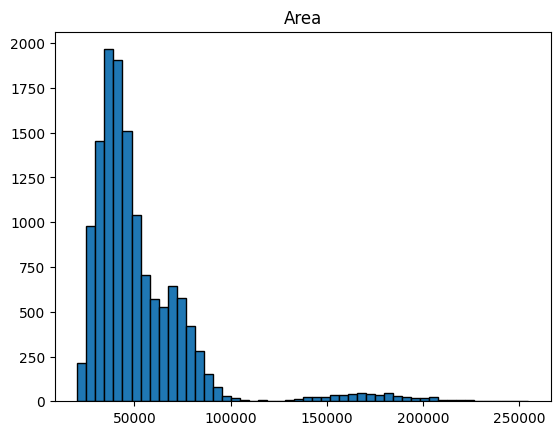

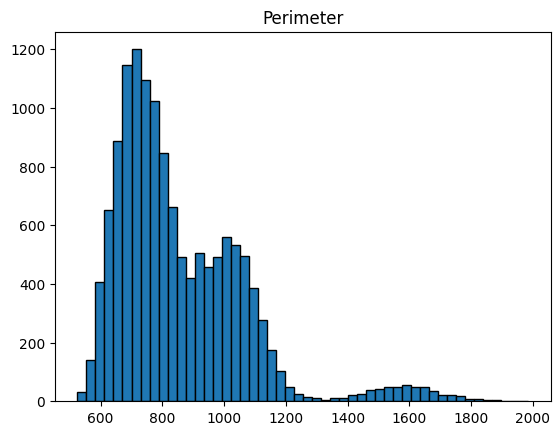

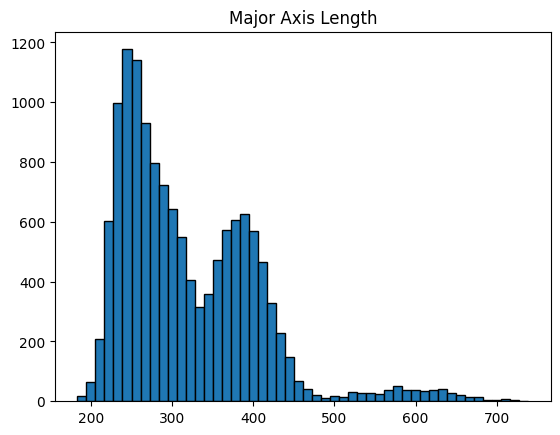

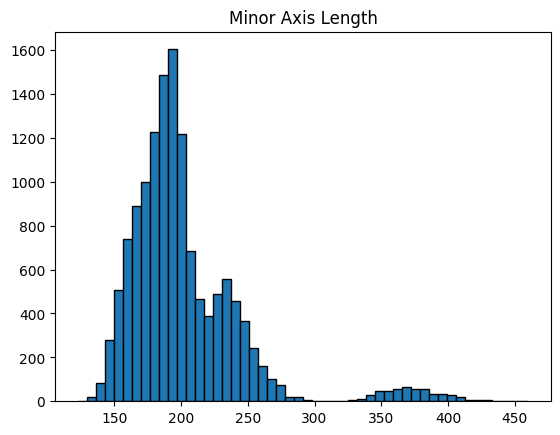

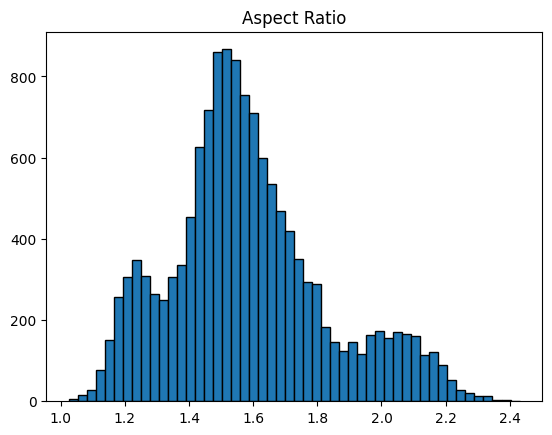

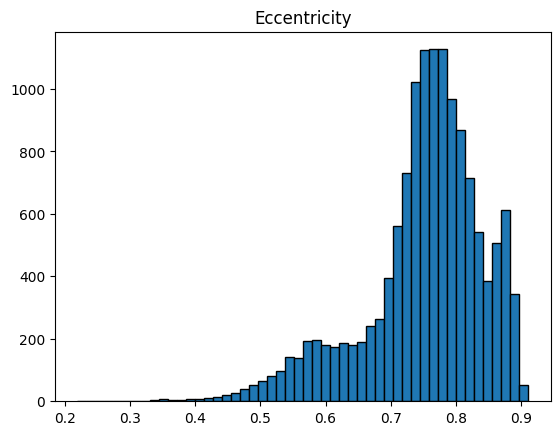

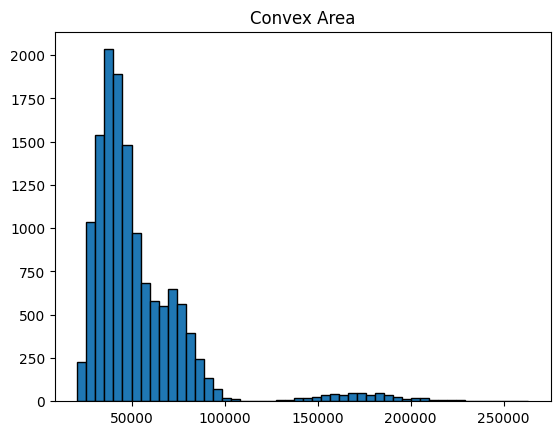

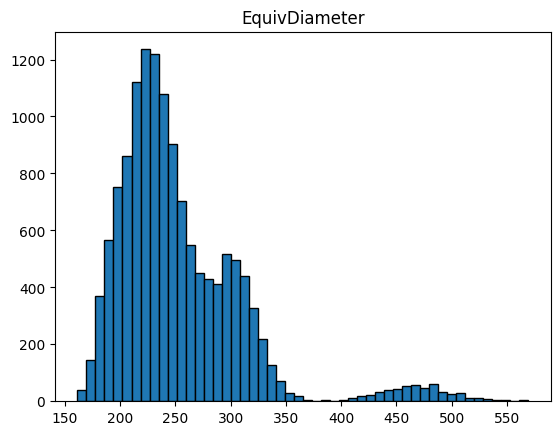

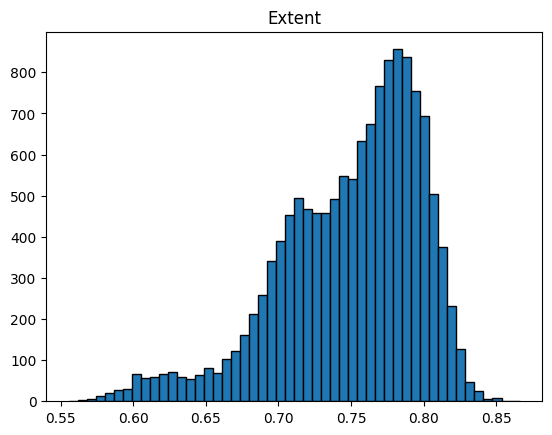

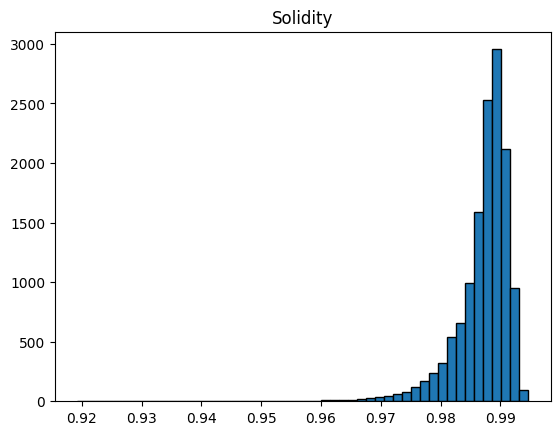

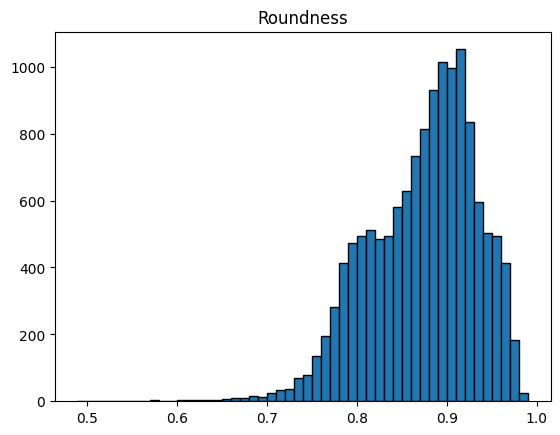

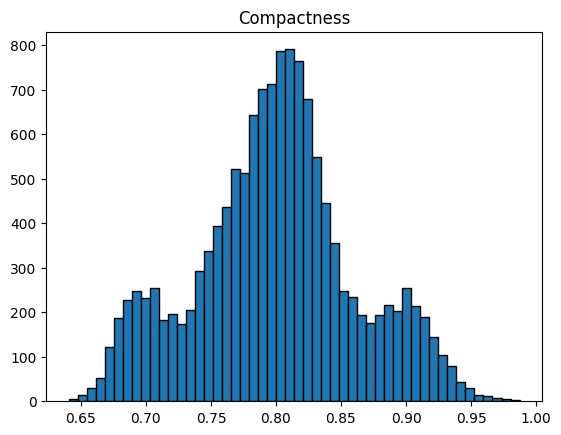

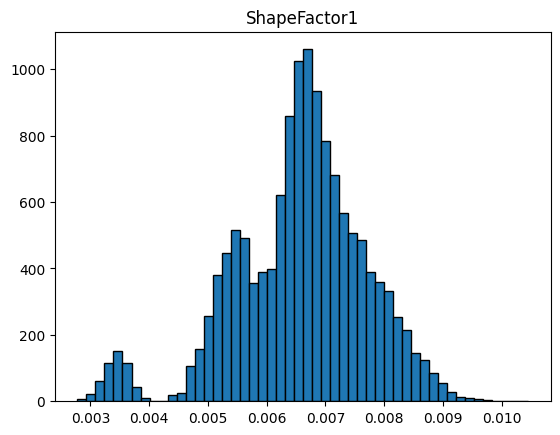

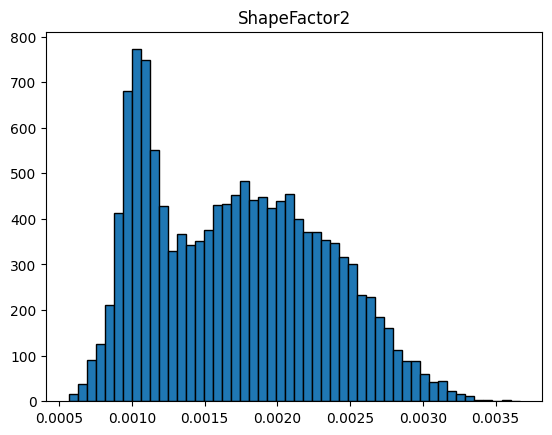

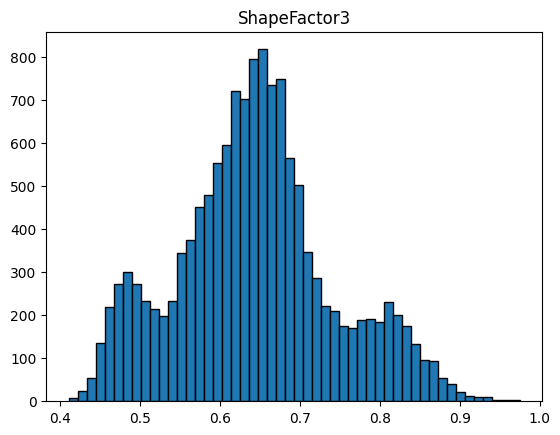

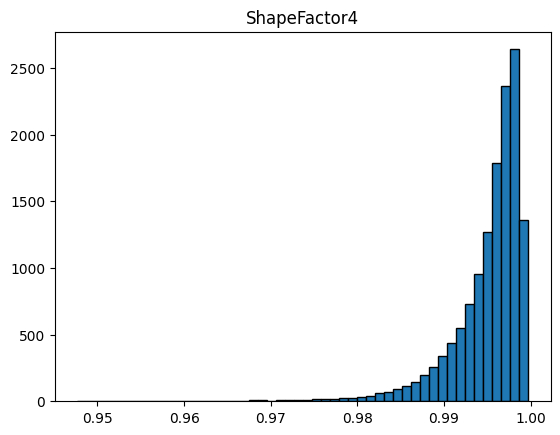

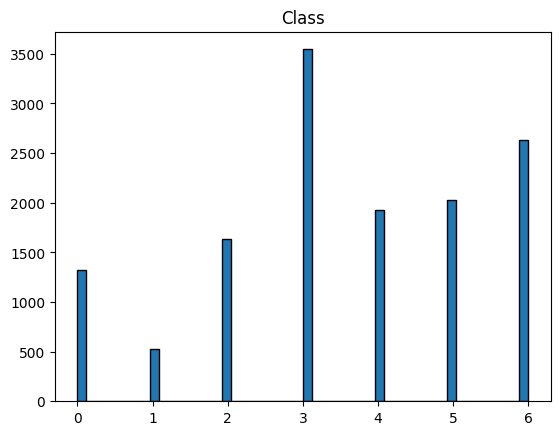

In [26]:
# Class is a categorical attribute so convert to numerical
bean['Class'] = bean['Class'].astype('category').cat.codes
bean['Class']

# checking normality - not a normal distribution
# plt.hist(bean, edgecolor = "black", bins = 50)

# checking normality of each attribute
plt.hist(bean.Area, edgecolor = "black", bins = 50)
plt.title("Area")
plt.show()

plt.hist(bean.Perimeter, edgecolor = "black", bins = 50)
plt.title("Perimeter")
plt.show()

plt.hist(bean.MajorAxisLength, edgecolor = "black", bins = 50)
plt.title("Major Axis Length")
plt.show()

plt.hist(bean.MinorAxisLength, edgecolor = "black", bins = 50)
plt.title("Minor Axis Length")
plt.show()

plt.hist(bean.AspectRatio, edgecolor = "black", bins = 50)
plt.title("Aspect Ratio")
plt.show()

plt.hist(bean.Eccentricity, edgecolor = "black", bins = 50)
plt.title("Eccentricity")
plt.show()

plt.hist(bean.ConvexArea, edgecolor = "black", bins = 50)
plt.title("Convex Area")
plt.show()

plt.hist(bean.EquivDiameter, edgecolor = "black", bins = 50)
plt.title("EquivDiameter")
plt.show()

plt.hist(bean.Extent, edgecolor = "black", bins = 50)
plt.title("Extent")
plt.show()

plt.hist(bean.Solidity, edgecolor = "black", bins = 50)
plt.title("Solidity")
plt.show()

plt.hist(bean.Roundness, edgecolor = "black", bins = 50)
plt.title("Roundness")
plt.show()

plt.hist(bean.Compactness, edgecolor = "black", bins = 50)
plt.title("Compactness")
plt.show()

plt.hist(bean.ShapeFactor1, edgecolor = "black", bins = 50)
plt.title("ShapeFactor1")
plt.show()

plt.hist(bean.ShapeFactor2, edgecolor = "black", bins = 50)
plt.title("ShapeFactor2")
plt.show()

plt.hist(bean.ShapeFactor3, edgecolor = "black", bins = 50)
plt.title("ShapeFactor3")
plt.show()

plt.hist(bean.ShapeFactor4, edgecolor = "black", bins = 50)
plt.title("ShapeFactor4")
plt.show()

plt.hist(bean.Class, edgecolor = "black", bins = 50)
plt.title("Class")
plt.show()

In [27]:
# Normalizing all attributes since there's no normality in the graphs above

# target variable = Class

Area = preprocessing.scale(bean.Area)
Perimeter = preprocessing.scale(bean.Perimeter)
MajorAxisLength = preprocessing.scale(bean.MajorAxisLength)
MinorAxisLength = preprocessing.scale(bean.MinorAxisLength)
AspectRatio = preprocessing.scale(bean.AspectRatio)
Eccentricity = preprocessing.scale(bean.Eccentricity)
ConvexArea = preprocessing.scale(bean.ConvexArea)
EquivDiameter = preprocessing.scale(bean.EquivDiameter)
Extent = preprocessing.scale(bean.Extent)
Solidity = preprocessing.scale(bean.Solidity)
Roundness = preprocessing.scale(bean.Roundness)
Compactness = preprocessing.scale(bean.Compactness)
ShapeFactor1 = preprocessing.scale(bean.ShapeFactor1)
ShapeFactor2 = preprocessing.scale(bean.ShapeFactor2)
ShapeFactor3 = preprocessing.scale(bean.ShapeFactor3)
ShapeFactor4 = preprocessing.scale(bean.ShapeFactor4)
Class = preprocessing.scale(bean.Class)

# new dataframe to store all the normalized values
bean_norm = pd.DataFrame()

#inserting normalized predictors into the new dataframe
bean_norm.insert(0, "Area", Area)
bean_norm.insert(1, "Perimeter", Perimeter)
bean_norm.insert(2, "MajorAxisLength", MajorAxisLength)
bean_norm.insert(3, "MinorAxisLength", MinorAxisLength)
bean_norm.insert(4, "AspectRatio", AspectRatio)
bean_norm.insert(5, "Eccentricity", Eccentricity)
bean_norm.insert(6, "ConvexArea", ConvexArea)
bean_norm.insert(7, "EquivDiameter", EquivDiameter)
bean_norm.insert(8, "Extent", Extent)
bean_norm.insert(9, "Solidity", Solidity)
bean_norm.insert(10, "Roundness", Roundness)
bean_norm.insert(11, "Compactness", Compactness)
bean_norm.insert(12, "ShapeFactor1", ShapeFactor1)
bean_norm.insert(13, "ShapeFactor2", ShapeFactor2)
bean_norm.insert(14, "ShapeFactor3", ShapeFactor3)
bean_norm.insert(15, "ShapeFactor4", ShapeFactor4)
bean_norm.insert(16, "Class", Class)

bean_norm

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,-0.840749,-1.143319,-1.306598,-0.631153,-1.565053,-2.185720,-0.841451,-1.063341,0.289087,0.367614,1.423867,1.839116,0.680786,2.402173,1.925723,0.838371,0.802422
1,-0.829188,-1.013924,-1.395911,-0.434445,-1.969784,-3.686040,-0.826102,-1.044217,0.697477,-0.462907,0.231054,2.495449,0.367967,3.100894,2.689702,0.771138,0.802422
2,-0.807157,-1.078829,-1.252357,-0.585735,-1.514291,-2.045336,-0.808704,-1.008084,0.578195,0.518417,1.252865,1.764843,0.603129,2.235091,1.841356,0.916755,0.802422
3,-0.785741,-0.977215,-1.278825,-0.439290,-1.741618,-2.742211,-0.773975,-0.973337,0.671260,-2.241767,0.515049,2.081715,0.401718,2.515075,2.204250,-0.197985,0.802422
4,-0.781239,-1.097384,-1.380471,-0.266663,-2.117993,-4.535028,-0.784286,-0.966080,0.476020,0.804772,1.874992,2.765330,0.118268,3.270983,3.013462,0.939640,0.802422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,-0.373471,-0.446083,-0.366669,-0.363055,-0.123703,0.153343,-0.378191,-0.364148,-0.716284,0.684173,0.727872,0.032433,0.261424,0.055629,-0.006086,0.760813,-0.291286
13607,-0.373334,-0.456336,-0.450053,-0.257015,-0.432979,-0.165141,-0.378662,-0.363962,1.022933,0.774384,0.818807,0.362794,0.110383,0.285117,0.328393,0.722659,-0.291286
13608,-0.372038,-0.447833,-0.450478,-0.246456,-0.448618,-0.182940,-0.376143,-0.362197,-0.403392,0.591370,0.758468,0.370533,0.104270,0.289205,0.336328,0.390251,-0.291286
13609,-0.371765,-0.427029,-0.428974,-0.266742,-0.380735,-0.106960,-0.372851,-0.361825,-0.903414,0.143717,0.581753,0.285098,0.141907,0.228375,0.248973,0.036440,-0.291286


# Visualizations

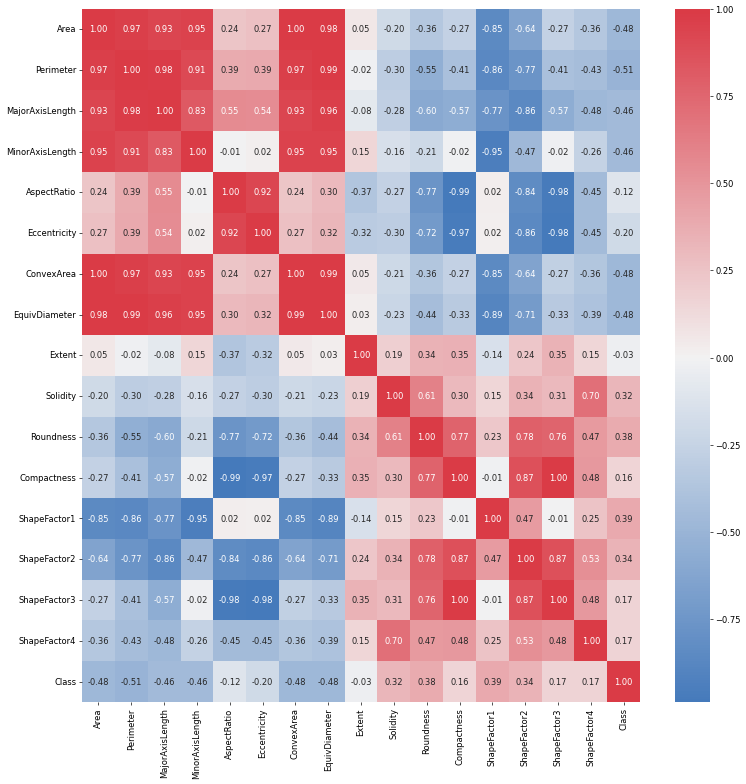

'\n# predictors with highest correlations to class (|corr|>0.3):\nArea\nPerimeter\nMajor Axis Length\nMinor Axis Length\nConvex Area\nEquivDiameter\nSolidity\nRoundness\nShape Factor 1\nShape Factor 2\n\nLowest:\nAspect Ratio\nEccentinity\nExtent\nCompactness\nShape Factor 3\nShape Factor 4\n'

In [28]:
# printing the correlation matrix of the normalized dataset
corr_matrix = bean_norm.corr()
fig = plt.figure(figsize=(15,15), dpi = 60)

# Define custom color map
cmap = sn.diverging_palette(250, 10, as_cmap=True)

sn.heatmap(corr_matrix, annot=True, fmt='.2f', cmap=cmap, center=0)

plt.show()

"""
# predictors with highest correlations to class (|corr|>0.3):
Area
Perimeter
Major Axis Length
Minor Axis Length
Convex Area
EquivDiameter
Solidity
Roundness
Shape Factor 1
Shape Factor 2

Lowest:
Aspect Ratio
Eccentinity
Extent
Compactness
Shape Factor 3
Shape Factor 4
"""

#Parameter selection

In [29]:
import pandas as pd

bean2 = pd.DataFrame()
bean2.insert(0, "Area", Area)
bean2.insert(1, "Perimeter", Perimeter)
bean2.insert(2, "MajorAxisLength", MajorAxisLength)
bean2.insert(3, "MinorAxisLength", MinorAxisLength)
bean2.insert(4, "ConvexArea", ConvexArea)
bean2.insert(5, "EquivDiameter", EquivDiameter)
bean2.insert(6, "Solidity", Solidity)
bean2.insert(7, "Roundness", Roundness)
bean2.insert(8, "ShapeFactor1", ShapeFactor1)
bean2.insert(9, "ShapeFactor2", ShapeFactor2)
bean2.insert(10, "Class", Class)

bean2.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,ConvexArea,EquivDiameter,Solidity,Roundness,ShapeFactor1,ShapeFactor2,Class
0,-0.840749,-1.143319,-1.306598,-0.631153,-0.841451,-1.063341,0.367614,1.423867,0.680786,2.402173,0.802422
1,-0.829188,-1.013924,-1.395911,-0.434445,-0.826102,-1.044217,-0.462907,0.231054,0.367967,3.100894,0.802422
2,-0.807157,-1.078829,-1.252357,-0.585735,-0.808704,-1.008084,0.518417,1.252865,0.603129,2.235091,0.802422
3,-0.785741,-0.977215,-1.278825,-0.439290,-0.773975,-0.973337,-2.241767,0.515049,0.401718,2.515075,0.802422
4,-0.781239,-1.097384,-1.380471,-0.266663,-0.784286,-0.966080,0.804772,1.874992,0.118268,3.270983,0.802422



#2.2 Model Construction
As stated earlier, you need to create four tree of models using scikit-learn or any other library
of your choice.
You will need to use GridSearchCV or similar libraries for hyper-parameter tuning and
cross-validation. It is up to you how many to choose, but you have to convince yourself and us that you have found the best values.
1. Plain Decision Tree Classifier / Regressor
2. Random Forest Classifier / Regressor
3. Adaboot Classifier / Regressor
4. XGBoost Classifier / Regressor


In [30]:
X = bean2.drop(columns=['Class'])
y = bean2['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Regular Decision Tree


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

encoder = LabelEncoder()
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier()

dtc = dtc.fit(X_train,y_train)

#Predict the response for test dataset
predictions = dtc.predict(X_test)
print(classification_report(y_test, predictions)) #accuracy = 0.88


dt_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('dt', DecisionTreeClassifier())])

params = [{'dt__max_depth': [3, 5, 7, 9],
         'dt__min_samples_leaf': [2, 3, 5]}]

gs_dt = GridSearchCV(dt_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)

gs_dt.fit(X_train, y_train)
print("Best Parameters: ")
print(gs_dt.best_params_)

# find best model score
print("Best Model Score: ")
print(gs_dt.score(X_train, y_train))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       390
           1       1.00      1.00      1.00       153
           2       0.88      0.87      0.87       479
           3       0.88      0.90      0.89      1062
           4       0.92      0.93      0.92       579
           5       0.93      0.92      0.92       621
           6       0.82      0.79      0.80       800

    accuracy                           0.88      4084
   macro avg       0.89      0.89      0.89      4084
weighted avg       0.88      0.88      0.88      4084

Best Parameters: 
{'dt__max_depth': 7, 'dt__min_samples_leaf': 3}
Best Model Score: 
0.9312480319093104


#Random Forest

In [32]:
param_grid = {
    'n_estimators': [1, 5, 10],       # Number of trees in the forest
    'max_depth': [10, 20],     # Maximum depth of the trees
    'min_samples_split': [5, 10],    # Minimum samples required to split a node
    'min_samples_leaf': [2, 4],      # Minimum samples required in a leaf node
    'max_features': ['auto', 'sqrt'],    # Number of features to consider for the best split
}
rf_classifier = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf_classifier,
                           param_grid=param_grid, cv=5,
                           scoring='accuracy', n_jobs=-1)

# Fit the model and perform hyperparameter tuning
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_model_score = best_rf_model.score(X_test, y_test)
print(best_params)


{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 10}


#Adaboost

In [33]:
from sklearn.ensemble import AdaBoostClassifier

# Define the AdaBoost hyperparameter grid
param_grid_ab = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
}

# Create the AdaBoost Classifier with a base estimator (e.g., Decision Tree)
ab_classifier = AdaBoostClassifier(estimator=DecisionTreeClassifier())

# Create a GridSearchCV object for hyperparameter tuning
grid_search_ab = GridSearchCV(estimator=ab_classifier,
                              param_grid=param_grid_ab,
                              cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model and perform hyperparameter tuning
grid_search_ab.fit(X_train, y_train)

# Get the best AdaBoost model
best_ab_model = grid_search_ab.best_estimator_
print(best_ab_model)


AdaBoostClassifier(estimator=DecisionTreeClassifier(), learning_rate=0.5,
                   n_estimators=200)


# XGBoost


In [34]:
import xgboost as xgb

# Define the XGBoost hyperparameter grid
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
}

# Create the XGBoost Classifier
xgb_classifier = xgb.XGBClassifier()

# Create a GridSearchCV object for hyperparameter tuning
grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model and perform hyperparameter tuning
grid_search_xgb.fit(X_train, y_train)

# Get the best XGBoost model
best_xgb_model = grid_search_xgb.best_estimator_
print(best_xgb_model)


KeyboardInterrupt: ignored

#2.3 Tree Visualization
Wherever possible, you will need to visualize the tree or the best estimator tree. Use visually
appealing libraries like graphviz or treeviz.
You will need to create the following tree
models:
1. Plain Decision Tree Classifier / Regressor
2. Random Forest Classifier / Regressor
3. Adaboot Classifier / Regressor
4. XGBoost Classifier / Regressor


# Decision Tree

In [ ]:
from ipywidgets.widgets.trait_types import date_to_json
from sklearn.tree import export_graphviz
import graphviz

# Create a Decision Tree Classifier with specific hyperparameters
dtc = DecisionTreeClassifier(max_depth=7, min_samples_split=5)

# Fit the model to your data
dtc.fit(X_train, y_train)

fn = ['Area',	'Perimeter', 'MajorAxisLength',	'MinorAxisLength'	,'ConvexArea'	,
      'EquivDiameter',	'Solidity',	'Roundness',	'ShapeFactor1',	'ShapeFactor2']
cn = ['Class']

# Visualize the Decision Tree
dt = export_graphviz(
    dtc,
    out_file=None,
    filled=True,
    rounded=True,
    special_characters=True,
)

graph = graphviz.Source(dt)
graph

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions using the best Random Forest model
y_pred = dtc.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and display other classification metrics
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)



In [ ]:
# ROC Curve - Decision Tree
!pip install scikit-plot
import scikitplot as skplt
import matplotlib.pyplot as plt

predicted_probas = dtc.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, predicted_probas)
skplt.metrics.plot_precision_recall_curve(y_test, predicted_probas)
plt.show()

# RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import graphviz



# Fit the Random Forest model
rf_model = RandomForestClassifier(n_estimators=10,
                                  max_depth= 10,
                                  max_features= 'auto',
                                  min_samples_leaf= 4,
                                  min_samples_split= 5,
                                  )

rf_model.fit(X, y)

# Visualize one of the Decision Trees in the forest (e.g., the first tree)
tree = rf_model.estimators_[0]
rf = export_graphviz(tree, out_file=None,
                           filled=True, rounded=True,
                           special_characters=True)

graphviz.Source(rf)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions using the best Random Forest model
y_pred = rf_model.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and display other classification metrics
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)


#Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Fit the AdaBoost model with a Decision Tree base estimator
ada_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=3),  # Set your desired max_depth
    learning_rate=0.5,
    n_estimators=200
)
ada_model.estimator.fit(X_train, y_train)

# Visualize the Decision Tree used by AdaBoost
ada = export_graphviz(ada_model.estimator,
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(ada)  # Save the visualization to a file (optional)
graph

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions using the best Random Forest model
y_pred = ada_model.estimator.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and display other classification metrics
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)


# XGboost

In [ ]:

# Fit the XGBoost model

xgb_model = xgb.XGBClassifier(base_score=None, booster=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob')
xgb_model.fit(X, y)

# Visualize the XGBoost tree
xgb.plot_tree(xgb_model, num_trees=1)  # Replace '0' with the tree number you want to visualize
plt.show()  # This will display the tree


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions using the best Random Forest model
y_pred = xgb_model.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and display other classification metrics
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

ROC

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from statistics import mean
from sklearn import preprocessing

# Predict the probability of positive class
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix,zero_one_loss
from sklearn.metrics import classification_report,matthews_corrcoef,accuracy_score
from sklearn.metrics import roc_auc_score, auc


pred_y = xgb_model.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, pred_y)
results = confusion_matrix(y_test, pred_y)
error = zero_one_loss(y_test, pred_y)
roc_auc_score(y_test, pred_y)


# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2
         #label='ROC curve (area = {:.2f})'.format(roc_auc)
         )
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Calculate precision-recall curve
precision, recall, threshold = precision_recall_curve(y_test, y_pred_prob)
average_precision = average_precision_score(y_test, y_pred_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()
